In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Set up the environment


import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import pandas as pd
import os
import numpy as np

# Step 2: Load and preprocess the dataset
data_dir = '/content/drive/MyDrive/Laboratory'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes

# Step 3: Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Step 4: Define the ResNet model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Step 5: Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Step 6: Evaluate the model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
class_report = classification_report(y_true, y_pred, target_names=class_names)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{class_report}")



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Loss: 0.3057192551592986
Epoch 2/30, Loss: 0.022905895253643394
Epoch 3/30, Loss: 0.005861380913605292
Epoch 4/30, Loss: 0.005949870615343873
Epoch 5/30, Loss: 0.0030570654586578407
Epoch 6/30, Loss: 0.003583633496115605
Epoch 7/30, Loss: 0.0032775498596796146
Epoch 8/30, Loss: 0.0026372212644976876
Epoch 9/30, Loss: 0.001834324182709679
Epoch 10/30, Loss: 0.004505902756742823
Epoch 11/30, Loss: 0.0022951869905227795
Epoch 12/30, Loss: 0.0021547875221585855
Epoch 13/30, Loss: 0.0013268900656839833
Epoch 14/30, Loss: 0.00130121077139241
Epoch 15/30, Loss: 0.002183969409088604
Epoch 16/30, Loss: 0.0017588665941730142
Epoch 17/30, Loss: 0.0013073649364135538
Epoch 18/30, Loss: 0.0026713235856732354
Epoch 19/30, Loss: 0.0009897443669615313
Epoch 20/30, Loss: 0.001215136973769404
Epoch 21/30, Loss: 0.0012236828382204596
Epoch 22/30, Loss: 0.0011423321023661022
Epoch 23/30, Loss: 0.0013245553855085745
Epoch 24/30, Loss: 0.0010065954847959802
Epoch 25/30, Loss: 0.00123616027121897

In [ ]:
# Step 7: Save predictions to a CSV file
predictions = pd.DataFrame({'True Label': y_true, 'Predicted Label': y_pred})
predictions.to_csv('ResNet_predictions.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('ResNet_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/10, Loss: 0.0010076130274683237, Accuracy: 1.0
Epoch 2/10, Loss: 0.0008552443032385781, Accuracy: 1.0
Epoch 3/10, Loss: 0.001468809265740371, Accuracy: 1.0
Epoch 4/10, Loss: 0.0008432186829547087, Accuracy: 1.0
Epoch 5/10, Loss: 0.00259431838154948, Accuracy: 1.0
Epoch 6/10, Loss: 0.0009264038574959462, Accuracy: 1.0
Epoch 7/10, Loss: 0.0019462541507285398, Accuracy: 1.0
Epoch 8/10, Loss: 0.0018442852354686086, Accuracy: 1.0
Epoch 9/10, Loss: 0.0008943980089194762, Accuracy: 1.0
Epoch 10/10, Loss: 0.0013982473998718585, Accuracy: 1.0


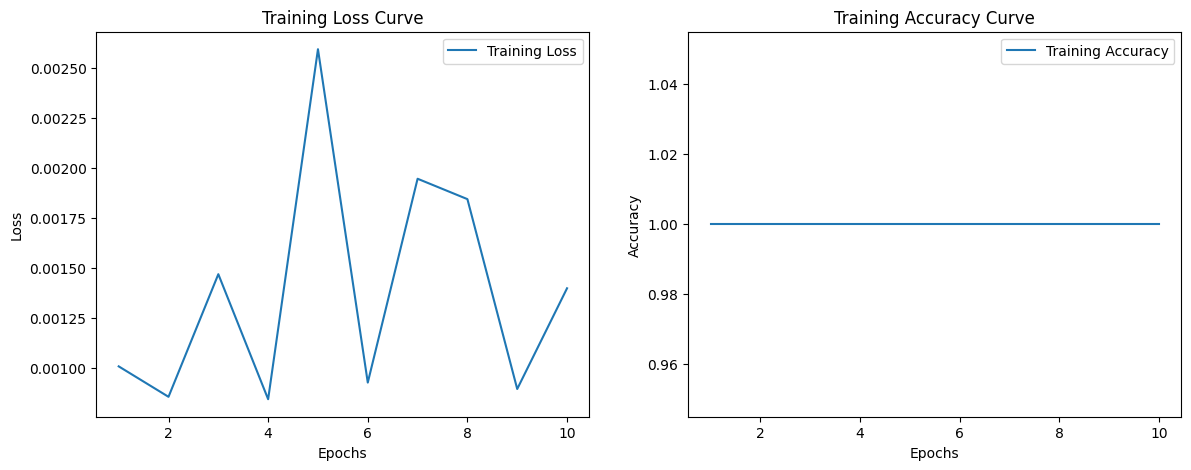

In [ ]:
import matplotlib.pyplot as plt


train_losses = []
train_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

# Plot the training loss and accuracy curves
plt.figure(figsize=(14, 5))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()

plt.show()
